# Netflix Dataset EDA - Starter Notebook

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [9]:
# Configure plot style
sns.set(style="whitegrid")

In [10]:
# Load the dataset
df = pd.read_csv('netflix_titles.csv')

## 1) Visão geral do conjunto de dados

In [11]:
# Visualizando o dataset.
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [12]:
# Visualizando qual o tipo de dado cada coluna apresenta além da informação de valores não nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
# Visualizando a quantidade de valores únicos em cada coluna do meu dataset.

unique_values = []

for i in df.columns[0:12].tolist():
    print(i, ':', len(df[i].astype(str).value_counts()))
    unique_values.append(len(df[i].astype(str).value_counts()))

show_id : 8807
type : 2
title : 8807
director : 4529
cast : 7693
country : 749
date_added : 1768
release_year : 74
rating : 18
duration : 221
listed_in : 514
description : 8775


In [14]:
# Como a única coluna com valor númerico é a 'release_year', poucas informações podem ser tiradas.
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [15]:
df.shape

(8807, 12)

- As primeiras 10 linhas revelam a estrutura geral do dataset, que possui 12 colunas e 8807 linhas. A maioria das colunas contém informações descritivas, com exceção da coluna `release_year` que possui dados númericos. 

- Destaca-se a diversidade de informações contidas no conjunto, incluindo país de produção, diretor, gêneros e elenco, enquanto a coluna `type` apresenta apenas duas categorias podendo ser assim caracterizada como uam variável categórica.

- Nota-se também a presença de valores nulos já nas primeiras linhas, o que indica a necessidade de investigação e tratamento posterior.  

## 2) Tratando os valores nulos

In [16]:
# Encontrando o número de valores nulos por coluna.
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [17]:
# Substituindo os valores nulos por 'Desconhecidos'.
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['duration'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)

C:\Users\Joalyson Lima\AppData\Local\Temp\ipykernel_5976\3883624256.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
C:\Users\Joalyson Lima\AppData\Local\Temp\ipykernel_5976\3883624256.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [18]:
# Excluindo os valores da data para garantir uma análise temporal mais precisa.
df = df.dropna(subset=['date_added'])

In [19]:
# Verificando se todos os valores foram tratados corretamente
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

- É evidente a grande quantidade de valores ausentes nas colunas `director`, `cast` e `country`, com destaque para a primeira citada. Porém, mesmo sendo úteis para uma análise de nomes mais aprofundada, esses valores não são essenciais para uma análise exploratória inicial. Por isso, os valores foram preenchidos com `"Unknown"` para evitar problemas de agrupamento e visualizações posteriormente. 

- Mesmo tendo poucos valores ausentes, as colunas de `duration` e `rating`, embora com menor quantidade de valores ausentes, foram tratadas da mesma forma, garantindo consistência no tratamento.

- Em contrapartida, a coluna `date_added`, por conter poucos valores nulos e grande importância para uma análise temporal mais detalhada, teve seus registros incompletos excluídos para garantir apenas dados válidos na análise. 

## 3) Analíse Exploratória Univariada

### 3.1) Frequência de conteúdo por tipo:

In [20]:
#Percentagem 
df['type'].value_counts(normalize=True)

type
Movie      0.696942
TV Show    0.303058
Name: proportion, dtype: float64

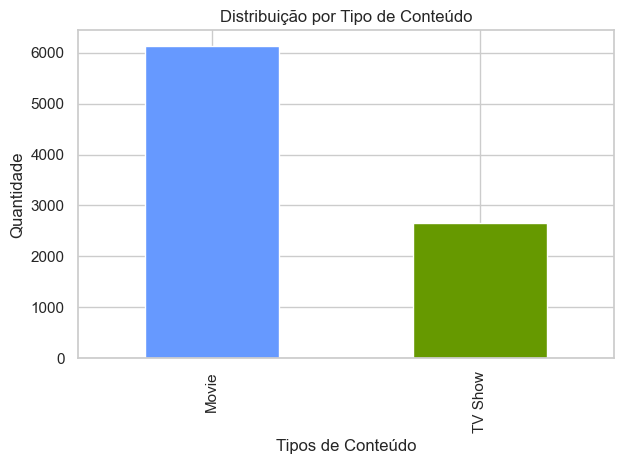

In [21]:
df['type'].value_counts().plot(kind='bar', title='Distribuição por Tipo de Conteúdo', color=['#6699FF', '#669900']) 
plt.xlabel('Tipos de Conteúdo')
plt.ylabel('Quantidade')
plt.tight_layout()

- A coluna `type` mostra que a maior parte do catálogo da Netflix é composta por filmes, que representam cerca de 70% do total de títulos.
- As séries (TV Shows) ocupam a parcela restante.
- Isso sugere um foco maior da palataforma em filmes, embora o crescimento de séries seja perceptível nos últimos anos como veremos posteriormente.

### 3.2) Classificações mais Comuns:

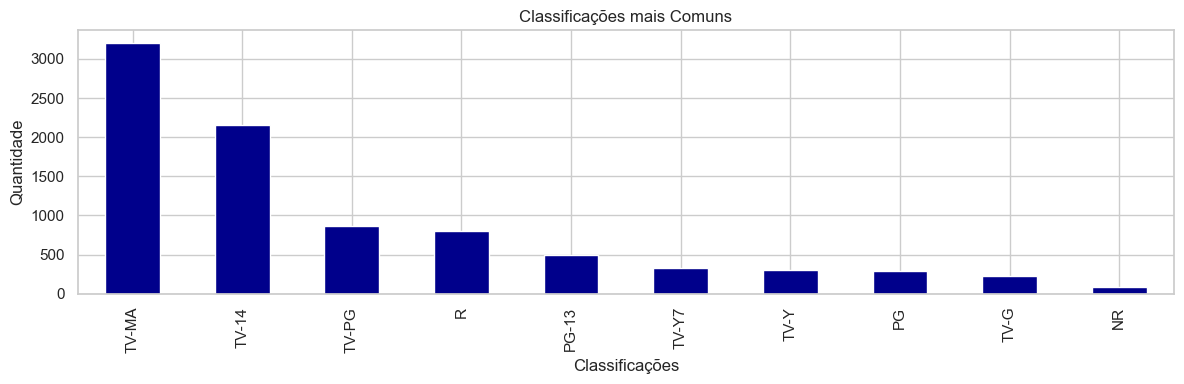

In [22]:
df['rating'].value_counts().head(10).plot(kind='bar', title='Classificações mais Comuns', color='darkblue', figsize=(12,4))
plt.xlabel('Classificações')
plt.ylabel('Quantidade')
plt.tight_layout()

- É possível destacar que **TV-MA** e **TV-14** são predominantes.

### 3.3) Títulos por Ano de Lançamento:

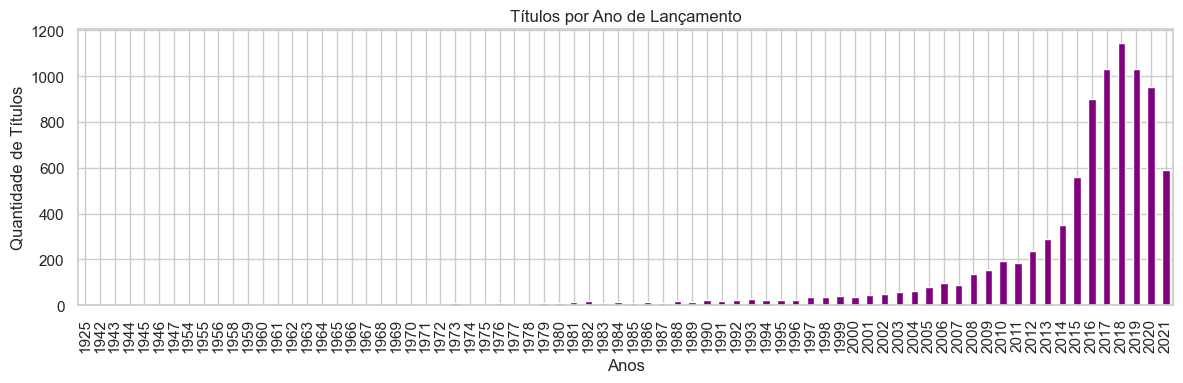

In [23]:
df['release_year'].value_counts().sort_index().plot(kind='bar', title='Títulos por Ano de Lançamento', color='purple', figsize=(12,4))
plt.xlabel('Anos')
plt.ylabel('Quantidade de Títulos')
plt.tight_layout()

- É possível notar um crescimento exponencial no lançamento de conteúdos na plataforma, que apresenta pico no ano de **2017** seguido de um declínio até o ano de 2020.
- Do ano **2020** para o ano seguinte, **2021**, nota-se uma queda expressiva nos lançamentos.
- A causa desta queda pode estar relacionada com a pandemia de COVID-19 que pausou a produção de conteúdos no mesmo período.

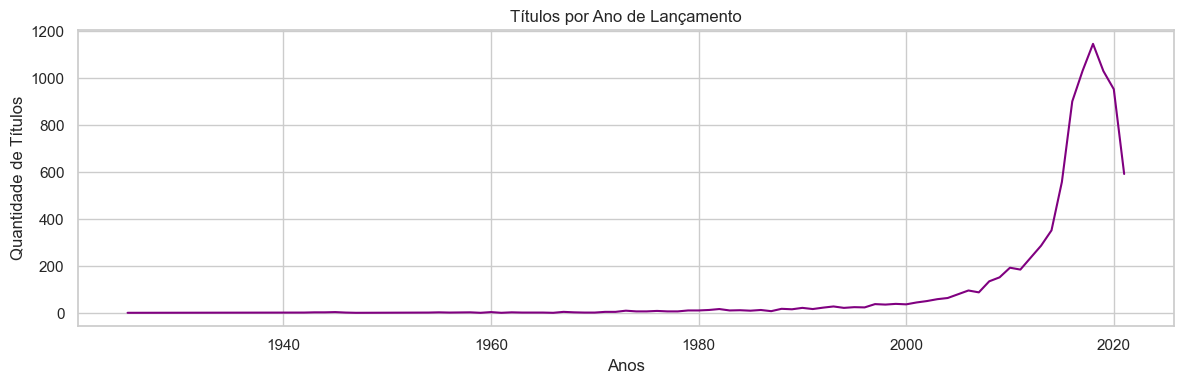

In [24]:
df['release_year'].value_counts().sort_index().plot(kind='line', title='Títulos por Ano de Lançamento', color='purple', figsize=(12,4))
plt.xlabel('Anos')
plt.ylabel('Quantidade de Títulos')
plt.tight_layout()

### 3.4) Top 10 Países com Mais Títulos:

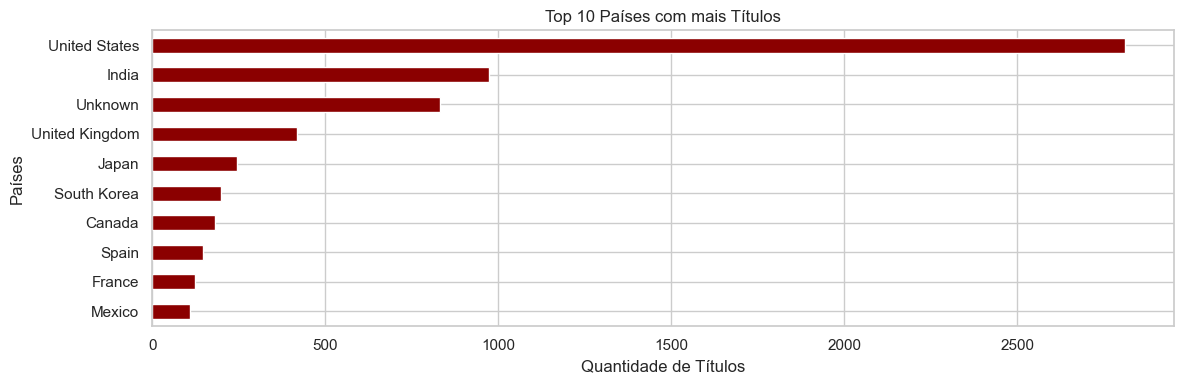

In [25]:
df['country'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', title='Top 10 Países com mais Títulos', color='darkred', figsize=(12,4))
plt.xlabel('Quantidade de Títulos')
plt.ylabel('Países')
plt.tight_layout()

- Três países se destacam dos demais em lançamentos na plataforma: **United States**, **India** e **United Kingdom**.
- É possível notar uma quantidade significativa de títulos com país de produção desconhecido, **Unknown**, com relação aos demais.
- No top 10 destacam-se 3 continentes: **América do Norte**, **Ásia** e **Europa**, indicando uma concentração de conteúdo voltada a essas regiões.

### 3.5) Gêneros mais comuns:

In [26]:
df_genre = df['listed_in'].dropna().copy()

In [27]:
df_genre_split = df_genre.apply(lambda x: [genre.strip() for genre in x.split(',')])

In [28]:
list_genres = [genre for sublist in df_genre_split for genre in sublist]

In [29]:
genre_counts = Counter(list_genres)

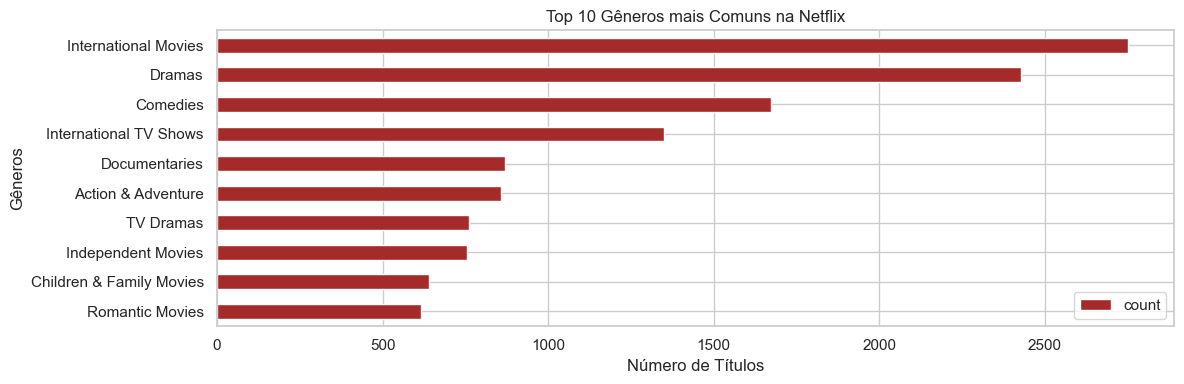

In [30]:
df_genres = pd.DataFrame(genre_counts.items(), columns=['genre', 'count'])
df_genres.nlargest(10, 'count').sort_values('count', ascending=True).plot(kind='barh', x='genre', y ='count', title='Top 10 Gêneros mais Comuns na Netflix', color='brown', figsize=(12,4))
plt.xlabel('Número de Títulos')
plt.ylabel('Gêneros')
plt.tight_layout()

- Nota-se primeiro a grande variedade de genêros da plataforma.
- **Dramas** e **Comédias** se destacam como os maiores gêneros, evidenciando a preferência por temáticas populares e universais.

## 4) Análise Exploratória Bivariada

### 4.1) Classificação Indicativa por Tipo de Conteúdo:

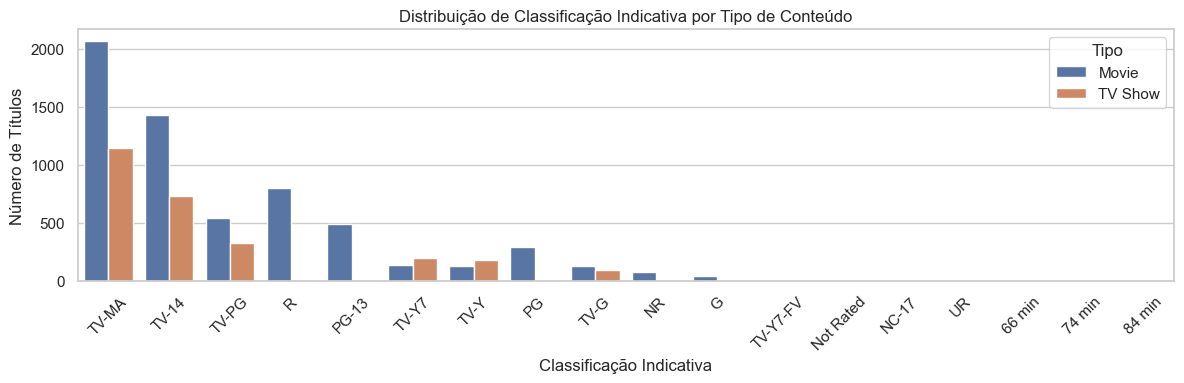

In [31]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index)

plt.title('Distribuição de Classificação Indicativa por Tipo de Conteúdo')
plt.xlabel('Classificação Indicativa')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=45)
plt.legend(title='Tipo')
plt.tight_layout()
plt.show()

- Ao observar a distribuição de classificações indicativas (`rating`) entre filmes e séries é possível perceber que ambos os tipos apresentam forte presença de conteúdos classificados como **TV-MA** e **TV-14**, voltados ao público jovem e adulto.
- Filmes aparecem com maior variedade de classificações (`PG`, `R`, `TV-PG`, etc.), indicando uma maior diversidade de faixas etárias atendidas. Já séries tendem a se concentrar em classificações mais restritivas, como `TV-MA`.
- A predominância de `TV-MA` em ambos os tipos de conteúdo revela uam preferência por produções adultas, o que pode refletir o perfil demográfico dos assinantes.
- Essa informação pode ser útil para entender o posicionamento da plataforma em relação a sua audiência-alvo.

### 4.2) Evolução de Séries e Filmes em relação ao Tempo:

In [32]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

In [33]:
year_type = df.groupby(['year_added', 'type']).size().reset_index(name='quantidade')

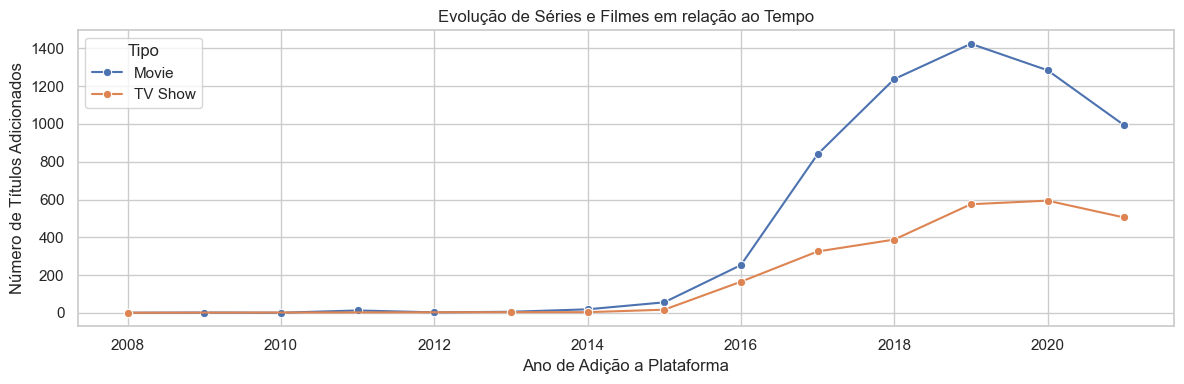

In [35]:
plt.figure(figsize=(12,4))
sns.lineplot(data=year_type, x='year_added', y='quantidade', hue='type', marker='o')
plt.title('Evolução de Séries e Filmes em relação ao Tempo')
plt.xlabel('Ano de Adição a Plataforma')
plt.ylabel('Número de Títulos Adicionados')
plt.legend(title='Tipo')
plt.tight_layout()
plt.show()

- O gráfico mostra o número de títulos adicionados à plataforma ao longo do tempo, divididos entre filmes e séries.
- É possível perceber um crescimento significativo a partir de **2016**, com destaque para o aumento de séries nos anos seguintes.
- O pico geral aconteceu no ano de **2019**, seguido por uma queda nos anos seguintes, provavelmente influenciada pela pandemia e seus efeitos na produção audiovisual.

release_year x rating

title_length x type

### 4.3) Classificações Indicativas Adicionadas em Relação ao Ano de Lançamento:

In [61]:
top_ratings = df['rating'].value_counts().head(6).index
df_filter = df[df['rating'].isin(top_ratings)]
df_filter = df_filter[df_filter['release_year'] >= 2000]
release_year_rating = df_filter.groupby(['release_year', 'rating']).size().reset_index(name='quantidade')

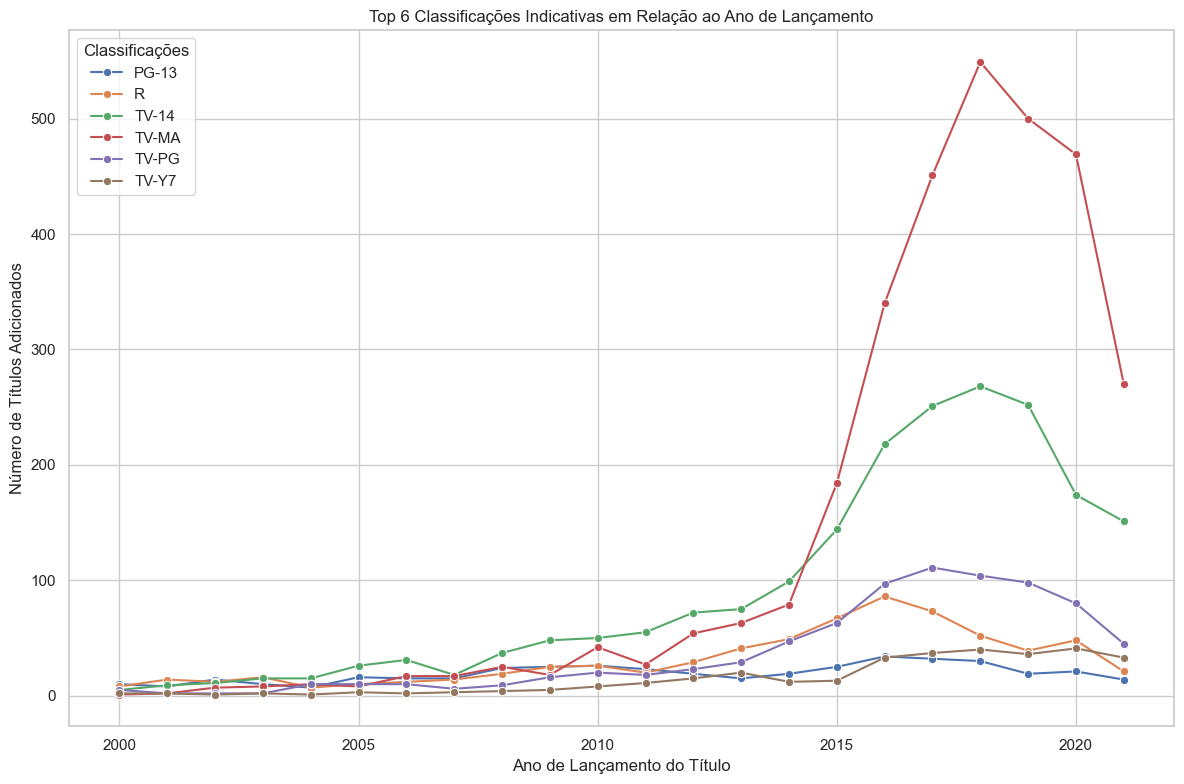

In [68]:
plt.figure(figsize=(12,8))
sns.lineplot(data=release_year_rating, x='release_year', y='quantidade', hue='rating', marker='o')
plt.title('Top 6 Classificações Indicativas em Relação ao Ano de Lançamento')
plt.xlabel('Ano de Lançamento do Título')
plt.ylabel('Número de Títulos Adicionados')
plt.legend(title='Classificações')
plt.tight_layout()
plt.show()

- O gráfico mostra a evolução dos títulos da plataforma por ano de lançamento, com base nas classificações indicativas mais frequentes.
- Para tornar o gráfico legível, foram incluídos apenas as 6 classificações mais frequentes, além de um recorte temporal a partir do ano 2000.
- Nota-se uma forte concentração de títulos classificados como **TV-MA** e **TV-14**, que apresentam um forte crescimento a partir do ano **2014** acompanhado de um declínio no ano de **2018**, que evidencia a ênfase da plataforma em conteúdos voltados para o público jovem e adulto neste período.
- As demais classificações acompanham essa tendência com excessão de **R**, que inicia a declinar já no ano de **2015**. Isso pode indicar uma redução do foco da plataforma em conteúdos que necessitam da surpervisão dos pais, voltando suas atenções para conteúdos mais maduros.

### 4.4) Tamanho dos Títulos com Relação ao Tipo de Conteúdo:

In [160]:
df['title_length'] = df['title'].apply(lambda x: len(x))
title_lenght_type = df[['type', 'title_length']].copy()

df_Movie_type = title_lenght_type[title_lenght_type['type']=='Movie'].describe().reset_index()
df_Movie_type['type'] = 'Movie'
df_Movie_type.rename(columns={'title_length': 'valor'}, inplace=True)

df_TVSeries_type = title_lenght_type[title_lenght_type['type']=='TV Show'].describe().reset_index()
df_TVSeries_type['type'] = 'TV Show'
df_TVSeries_type.rename(columns={'title_length': 'valor'}, inplace=True)

df_titles_type = pd.concat([df_Movie_type, df_TVSeries_type], axis=0)

metricas_interesse = ['mean', 'std', '25%', '50%', '75%', 'min', 'max']
df_titles_type = df_titles_type[df_titles_type['index'].isin(metricas_interesse)]

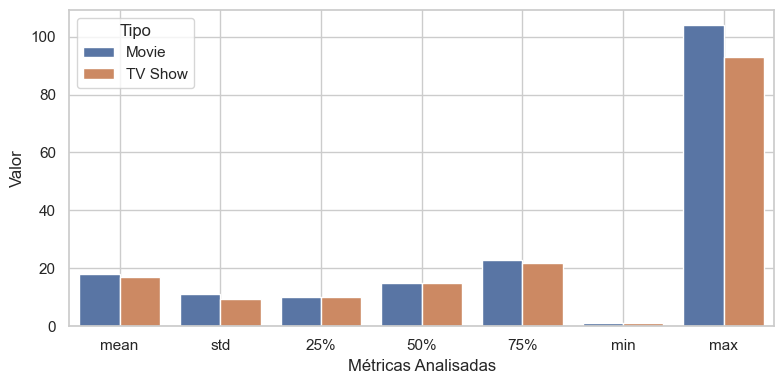

In [162]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_titles_type, x='index', y='valor', hue='type', order=['mean', 'std', '25%', '50%', '75%', 'min', 'max'])
plt.xlabel('Métricas Analisadas')
plt.ylabel('Valor')
plt.legend(title='Tipo')
plt.grid(True)
plt.tight_layout()
plt.show()

- Filmes tendem a ter títulos ligeiramente maiores do que séries.
- As métricas de média, desvio padrão e percentis confirmam essa tendência de forma consistente.